# Качество обучения

### 1. Обозначения

Итак, мы уже умеем генерировать случаную выборку и обучать там простейший линейной классификатор, давайте посмотрим, какие есть метрики. Для этого нам потребуются кое-какие обозначения.

Итак, у нас есть всего два класса 1 (positive или красный цвет) и -1 (negative или синий цвет).

* TCP (test condition positive) – тестовые объекты, который имеют класс 1.
* TCN (test condition negative) – тестовые объекты, который имеют класс -1.

Очевидно, что наш классификатор может разбить тестовое множество как-то иначе, поэтому вводятся еще два множества.

* PCP (predicted condition positive) – тестовые объекты, который для которых классификатор поставил метку 1.
* PCN (predicted condition negative) – тестовые объекты, для которых классификатор поставил метку -1.

Теперь введем следующие важные понятия: (красивую таблицу можно увидеть <a href="https://en.wikipedia.org/wiki/Precision_and_recall">здесь</a>)

* TP (true positive) = TCP $\cap$ PCP
* TN (true negative) = TCN $\cap$ PCN
* TP (false positive, type I error) = TCN $\cap$ PCP
* TN (false negative, type II error) = TCP $\cap$ PCN




### 2. Обучение классификатора

In [6]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn import linear_model as lm

%matplotlib inline 

In [7]:
mu_red = np.array([-1, 0])
mu_blue = np.array([1, 0])
I = np.eye(2, 2)

In [8]:
n = 200

X_red = np.random.multivariate_normal(mu_red, I, n)
y_red = np.ones(shape=(n,1))

X_blue = np.random.multivariate_normal(mu_blue, I, n)
y_blue = -np.ones(shape=(n,1))

In [9]:
half = n // 2

X_train = np.vstack([X_red[0:half, :], X_blue[0:half, :]])
y_train = np.vstack([y_red[0:half, :], y_blue[0:half, :]])

X_test = np.vstack([X_red[half:, :], X_blue[half:, :]])
y_test = np.vstack([y_red[half:, :], y_blue[half:, :]])

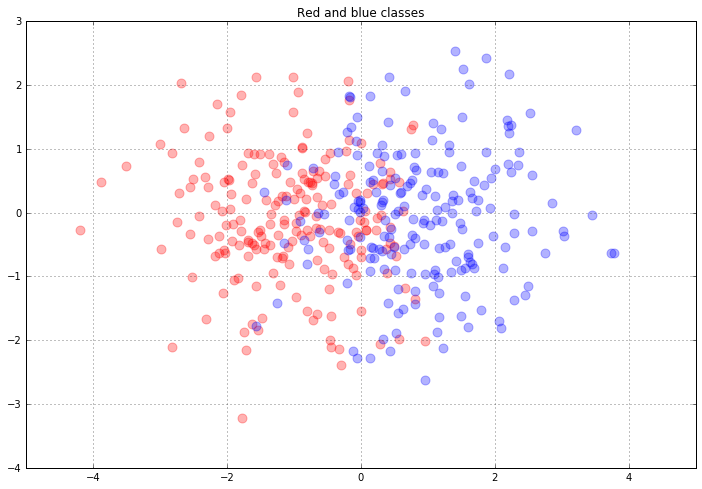

In [10]:
pl.figure(figsize=(12, 8))
pl.grid(True)
pl.title('Red and blue classes')

pl.scatter(X_red[:, 0], X_red[:, 1], s=80, color='red', alpha=0.3)
pl.scatter(X_blue[:, 0], X_blue[:, 1], s=80, color='blue', alpha=0.3)

In [12]:
classifier = lm.LinearRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred[y_pred >= 0] = 1
y_pred[y_pred < 0] = -1

### Acuracy

Здесь и далее для удобства записи опускается обозначение мощности множества.

Accurancy – метрика, показывающая, как много раз мы предсказали класс правильно <a href="https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification">(подробнее)</a>.

<center>
    $accurancy =  \begin{align*}\frac{TP + TN}{PCP + PCN} = \frac{TP + TN}{TP + FP + TN + FN}\end{align*}$
</center>

In [13]:
def accurancy(y_test, y_pred):
    return (y_test == y_pred).sum() / y_test.size if y_test.size else 1.0

In [14]:
print('accurancy = {accurancy}'.format(accurancy = accurancy(y_test, y_pred)))

accurancy = 0.845


### Precision и recall

Precision – точность предсказания класса 1 (positive).

<center>
    $precision =  \begin{align*}\frac{TP}{PCP} = \frac{TP}{TP + FP} \end{align*}$
</center>

In [15]:
def precision(y_test, y_pred):
    pcp = (y_pred == 1) 
    tp = (y_test == 1) * pcp
    pcp_n = pcp.sum()
    return tp.sum() / pcp_n if pcp_n > 0 else 1.0

In [16]:
print('precision = {precision}'.format(precision = precision(y_test, y_pred)))

precision = 0.8484848484848485


Recall – полнота предсказания класса 1 (positive).

<center>
    $recall =  \begin{align*}\frac{TP}{TCP} = \frac{TP}{TP + FN}\end{align*}$
</center>

In [17]:
def recall(y_test, y_pred):
    tcp = (y_test == 1) 
    tp = tcp * (y_pred == 1)
    tcp_n = tcp.sum()
    return tp.sum() / tcp_n if tcp_n > 0 else 1.0

In [18]:
print('recall = {recall}'.format(recall = recall(y_test, y_pred)))

recall = 0.84


Подробнее о метриках можно почитать <a href="https://en.wikipedia.org/wiki/Precision_and_recall">(здесь)</a>.

### F-score

F-мера –  гармоническое среднее precison и recall. Наибольшее значение 1 (идеальный классификатор), наименьшее 0.

<center>
    $F =  \begin{align*}2 \frac{precision \cdot recall}{precision + recall} \end{align*}$
</center>

In [19]:
def f_score(y_test, y_pred):
    p = precision(y_test, y_pred)
    r = recall(y_test, y_pred)
    return 2 * p * r / (p + r)

In [20]:
print('F-score = {f}'.format(f = f_score(y_test, y_pred)))

F-score = 0.8442211055276383


### AUC

* TPR (true positive rate) = синоним recall.
* FPR (false positive rate) = $\frac{FP}{TCN} = \frac{FP}{TN + FP}$

ROC – график, позволяющий оценить качество бинарной классификации, на сколько хорошо "раздвинуты" классы. Представляет собой соотношение TPR и FPR при варьировании порога решающего правила.

AUC – площадь под ROC-кривой. Наибольшее значение 1 (идеальный классификатор), наименьшее 0.

Подробнее можно прочитать <a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic">здесь</a>.

In [21]:
def true_positive_rate(y_test, y_pred):
    return recall(y_test, y_pred)

In [22]:
def false_positive_rate(y_test, y_pred):
    tcn = (y_test == -1) 
    fp = tcn * (y_pred == 1)
    tcn_n =  tcn.sum()
    return fp.sum() / tcn_n if tcn_n > 0 else 1.0

Для работы нам потребуются уже веростность принадлежности, для этого воспользуемся <a href="https://en.wikipedia.org/wiki/Sigmoid_function">$\sigma$-функцией</a>. Кстати, изучите этот <a href="http://docs.scipy.org/doc/numpy/reference/routines.functional.html">раздел</a>.

In [23]:
sigma = np.frompyfunc(lambda x: 1 / (1 + np.exp(-x)), 1, 1)

In [24]:
y_prob = sigma(classifier.predict(X_test))

А теперь напишем функцию, вычисляющую точки ROC-кривой.

In [37]:
def roc(y_prob, y_test):
    roc_xy = []
    for border in np.linspace(0, 1, 20):
        y_pred = np.array(y_prob >= border, dtype=int) - np.array(y_prob < border, dtype=int)
        roc_xy.append(
            [false_positive_rate(y_test, y_pred), true_positive_rate(y_test, y_pred)]
        )
    return np.array(roc_xy)

In [38]:
roc_xy = roc(y_prob, y_test)

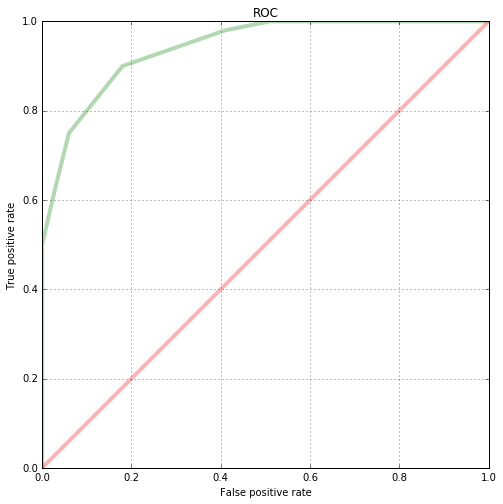

In [39]:
pl.figure(figsize=(8, 8))
pl.title('ROC')

pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.grid(True)

pl.plot([0, 1], [0, 1], color='red', linewidth=4, alpha=0.3)
pl.plot(roc_xy[:, 0], roc_xy[:, 1], color= 'green', linewidth=4, alpha=0.3)

Кстати, изучить готовые метрики качества библиотеки sklearn можно <a href="http://scikit-learn.org/stable/modules/classes.html#classification-metrics">здесь</ahred>.